### Step1: Loading and Preprocessing

In [61]:
# Importing necessary libraries
import pandas as pd


In [3]:
# Loading dataset
df = pd.read_csv("churn-bigml-80.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Getting list of all column names
headers = df.columns.values.tolist()
headers

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
#  Checking for missing values in each column
missing_values = df.isnull()
for col in headers:
    print(missing_values[col].value_counts())

State
False    2666
Name: count, dtype: int64
Account length
False    2666
Name: count, dtype: int64
Area code
False    2666
Name: count, dtype: int64
International plan
False    2666
Name: count, dtype: int64
Voice mail plan
False    2666
Name: count, dtype: int64
Number vmail messages
False    2666
Name: count, dtype: int64
Total day minutes
False    2666
Name: count, dtype: int64
Total day calls
False    2666
Name: count, dtype: int64
Total day charge
False    2666
Name: count, dtype: int64
Total eve minutes
False    2666
Name: count, dtype: int64
Total eve calls
False    2666
Name: count, dtype: int64
Total eve charge
False    2666
Name: count, dtype: int64
Total night minutes
False    2666
Name: count, dtype: int64
Total night calls
False    2666
Name: count, dtype: int64
Total night charge
False    2666
Name: count, dtype: int64
Total intl minutes
False    2666
Name: count, dtype: int64
Total intl calls
False    2666
Name: count, dtype: int64
Total intl charge
False    2666
Name:

In [7]:
#Counting number of zero entries in each column (for further cleaning)
zeros_per_column = (df == 0).sum()

print("Zeros in each column:")
print(zeros_per_column)



Zeros in each column:
State                        0
Account length               0
Area code                    0
International plan           0
Voice mail plan              0
Number vmail messages     1933
Total day minutes            2
Total day calls              2
Total day charge             2
Total eve minutes            1
Total eve calls              1
Total eve charge             1
Total night minutes          0
Total night calls            0
Total night charge           0
Total intl minutes          15
Total intl calls            15
Total intl charge           15
Customer service calls     555
Churn                     2278
dtype: int64


In [8]:
# Checking class distribution for target variable 'Churn'
print(df['Churn'].value_counts())


Churn
False    2278
True      388
Name: count, dtype: int64


In [9]:
# Creating a temporary DataFrame without the target column to identify numerical columns
df_11 = df.iloc[:,:-1]

In [10]:
numerical_cols = df_11.select_dtypes(include=['number']).columns.tolist()
numerical_cols

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [11]:
# Defining known categorical columns
categorical_col = ['State']
categorical_ordinal = ['International plan', 'Voice mail plan']


In [12]:
# Checking skewness of numerical columns
df[numerical_cols].skew()


Account length            0.079023
Area code                 1.110965
Number vmail messages     1.271774
Total day minutes        -0.053106
Total day calls          -0.128267
Total day charge         -0.053087
Total eve minutes        -0.012665
Total eve calls          -0.065209
Total eve charge         -0.012629
Total night minutes       0.023362
Total night calls         0.010410
Total night charge        0.023318
Total intl minutes       -0.224434
Total intl calls          1.358769
Total intl charge        -0.224569
Customer service calls    1.095176
dtype: float64

In [13]:
#Handling right-skewed numerical columns by replacing 0 values with median
right_skewed_cols = ['Number vmail messages','Total intl calls','Customer service calls']
for col in right_skewed_cols:
    median_val = df[col].median()
    df[col] = df[col].replace(0,median_val)
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,1,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,1,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,1,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,1,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,1,False


In [14]:
# Confirming new median values after replacement
for col in right_skewed_cols:
    print(f"{col} → median: {df[col].median()}")


Number vmail messages → median: 0.0
Total intl calls → median: 4.0
Customer service calls → median: 1.0


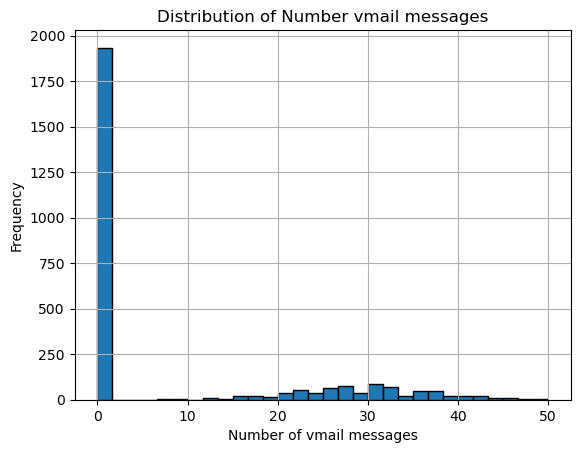

In [15]:
# Visualizing distribution of one skewed column
import matplotlib.pyplot as plt

plt.hist(df['Number vmail messages'], bins=30, edgecolor='black')
plt.title('Distribution of Number vmail messages')
plt.xlabel('Number of vmail messages')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [16]:
# Creating binary feature for vmail presence and dropping original column
df['Has vmail'] = df['Number vmail messages'].apply(lambda x:1 if x>0 else 0)

In [17]:
df.drop("Number vmail messages", axis=1, inplace=True)

In [18]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Has vmail
0,KS,128,415,No,Yes,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1
1,OH,107,415,No,Yes,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1
2,NJ,137,415,No,No,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,1,False,0
3,OH,84,408,Yes,No,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,Yes,No,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0
5,AL,118,510,Yes,No,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,1,False,0
6,MA,121,510,No,Yes,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,1
7,MO,147,415,Yes,No,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,1,False,0
8,WV,141,415,Yes,Yes,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,1,False,1
9,RI,74,415,No,No,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,1,False,0


In [19]:
# handling 0 values with left skewed cols with their mean value using pandas
symmetric_cols = ['Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes','Total eve calls','Total eve charge','Total intl minutes','Total intl charge' ]

for col in symmetric_cols:
    mean_val = df[col].mean()
    df[col] = df[col].replace(0, mean_val)

In [20]:
#Confirming new mean values after replacement
for col in symmetric_cols:
    print(f"{col} → mean: {df[col].mean()}")

Total day minutes → mean: 179.61626528162424
Total day calls → mean: 100.38545401541683
Total day charge → mean: 30.535294376857532
Total eve minutes → mean: 200.4613226403
Total eve calls → mean: 100.06114914887763
Total eve charge → mean: 17.03946101726107
Total intl minutes → mean: 10.2946194022249
Total intl charge → mean: 2.7800440165367672


In [21]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Has vmail
0,KS,128,415,No,Yes,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1
1,OH,107,415,No,Yes,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1
2,NJ,137,415,No,No,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,1,False,0
3,OH,84,408,Yes,No,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,Yes,No,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0
5,AL,118,510,Yes,No,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118,9.18,6.3,6,1.70,1,False,0
6,MA,121,510,No,Yes,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118,9.57,7.5,7,2.03,3,False,1
7,MO,147,415,Yes,No,157.0,79.0,26.69,103.1,94.0,8.76,211.8,96,9.53,7.1,6,1.92,1,False,0
8,WV,141,415,Yes,Yes,258.6,84.0,43.96,222.0,111.0,18.87,326.4,97,14.69,11.2,5,3.02,1,False,1
9,RI,74,415,No,No,187.7,127.0,31.91,163.4,148.0,13.89,196.0,94,8.82,9.1,5,2.46,1,False,0


In [22]:
#Ensuring no 0 values left with the dataset
zeros_per_column = (df == 0).sum()

print("Zeros in each column:")
print(zeros_per_column)

Zeros in each column:
State                        0
Account length               0
Area code                    0
International plan           0
Voice mail plan              0
Total day minutes            0
Total day calls              0
Total day charge             0
Total eve minutes            0
Total eve calls              0
Total eve charge             0
Total night minutes          0
Total night calls            0
Total night charge           0
Total intl minutes           0
Total intl calls             0
Total intl charge            0
Customer service calls       0
Churn                     2278
Has vmail                 1933
dtype: int64


In [23]:
# rearranging the column orders before encoding
df = df[['State','Account length','Area code','International plan','Voice mail plan','Has vmail','Total day minutes','Total day calls',
 'Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn']]
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Has vmail,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,1,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,1,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,1,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [24]:
# Label encoding for the col:Churn using scikit learn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

    
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Has vmail,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,1,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,1,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,1,0
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [25]:
# one hot encoding for state column
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),[0])],remainder='passthrough')
df_80 = pd.DataFrame(ct.fit_transform(df).astype('object'))
df_80.head()


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99.0,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.0,16.62,254.4,103,11.45,13.7,3,3.7,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110.0,10.3,162.6,104,7.32,12.2,5,3.29,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88.0,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [26]:
#Ordinal Encoding for Categorical_ordinal column
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df[categorical_ordinal] = ordinal_encoder.fit_transform(df[categorical_ordinal])

In [27]:
#Updating numerical_cols with 'Has vmail' column 
numerical_cols = ['Account length', 'Area code','Has vmail', 'Total day minutes', 'Total day calls',
                  'Total day charge', 'Total eve minutes', 'Total eve calls',
                  'Total eve charge', 'Total night minutes', 'Total night calls',
                  'Total night charge', 'Total intl minutes', 'Total intl calls',
                  'Total intl charge', 'Customer service calls']
numerical_cols

['Account length',
 'Area code',
 'Has vmail',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [28]:
#Creating preprocessing pipeline using ColumnTransformer
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    [  
         ('cat_ordinal_23',OrdinalEncoder(),categorical_ordinal),
        ('cat_onehot_1',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),categorical_col),
        ('num_cols',StandardScaler(),numerical_cols)
    ]
)

In [29]:
#visualizing preprocessor
preprocessor

ColumnTransformer(transformers=[('cat_ordinal_23', OrdinalEncoder(),
                                 ['International plan', 'Voice mail plan']),
                                ('cat_onehot_1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['State']),
                                ('num_cols', StandardScaler(),
                                 ['Account length', 'Area code', 'Has vmail',
                                  'Total day minutes', 'Total day calls',
                                  'Total day charge', 'Total eve minutes',
                                  'Total eve calls', 'Total eve charge',
                                  'Total night minutes', 'Total night calls',
                                  'Total night charge', 'Total intl minutes',
                                  'Total intl calls', 'Total intl charge',
                                  'Customer service calls'])])

In [30]:
#splitting dataset into features and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=42)


In [31]:
print(f" X.shape:{X.shape}\n Y.shape:{y.shape}")

 X.shape:(2666, 19)
 Y.shape:(2666,)


In [32]:
#printing shapes and structures
print(f" X_train.shape: {X_train.shape}\n X_test.shape:{X_test.shape}\n y_train.shape:{y_train.shape}\n y_test.shape:{y_test.shape} ")

 X_train.shape: (2399, 19)
 X_test.shape:(267, 19)
 y_train.shape:(2399,)
 y_test.shape:(267,) 


In [33]:
#determining the datatype of the X_train
print(type(X_train))


<class 'pandas.core.frame.DataFrame'>


In [34]:
print(X_train.columns.tolist()) 
print(f"\n\n Numerical col:{numerical_cols}\n Categorical col:{categorical_col}\n Categorical_Ordinal:{categorical_ordinal}")



['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Has vmail', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


 Numerical col:['Account length', 'Area code', 'Has vmail', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
 Categorical col:['State']
 Categorical_Ordinal:['International plan', 'Voice mail plan']


In [35]:
#Applying preprocessing pipeline to training and testing data
X_train_transform = preprocessor.fit_transform(X_train)



In [36]:
X_test_transform = preprocessor.transform(X_test)

In [37]:
#Checking transformed feature shapes
X_train_transform.shape

(2399, 69)

In [38]:
X_test_transform.shape

(267, 69)

In [39]:
# Checking class balance in target variable
y.value_counts(normalize=True)

Churn
0    0.854464
1    0.145536
Name: proportion, dtype: float64

###  Step:2 Training the logistic regression model using sklearn

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
#Training logistic regression model with balanced class weights
model = LogisticRegression(class_weight ='balanced')

In [42]:
model

LogisticRegression(class_weight='balanced')

In [43]:
model.fit(X_train_transform,y_train)

LogisticRegression(class_weight='balanced')

In [44]:
#Predicting on test set
y_predict = model.predict(X_test_transform)

In [45]:
y_predict

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0])

###  Step3: Interpreting model using Metrices like Accuracy,Precision,Recall & Roc curve

In [46]:
#Importing necessary libraries
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_curve,auc



In [47]:
#Evaluating model performance using standard classification metrics
print("Accuracy of Logistic Regression Model:",accuracy_score(y_test,y_predict))

Accuracy of Logistic Regression Model: 0.797752808988764


In [48]:
print("Precision:",precision_score(y_test,y_predict))

Precision: 0.42105263157894735


In [49]:
print("Recall:",recall_score(y_test,y_predict))

Recall: 0.7619047619047619


In [50]:
print("F1 Score:",f1_score(y_test,y_predict))

F1 Score: 0.5423728813559322


In [51]:
print("Classification Report:\n",classification_report(y_test,y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87       225
           1       0.42      0.76      0.54        42

    accuracy                           0.80       267
   macro avg       0.68      0.78      0.71       267
weighted avg       0.86      0.80      0.82       267



In [52]:
#confusion matrix:
cfm= confusion_matrix(y_test,y_predict)

In [53]:
print("Confusion Matrix:\n",cfm)

Confusion Matrix:
 [[181  44]
 [ 10  32]]


In [54]:
#Calculating ROC  AUC and plotting ROC curve
y_probs = model.predict_proba(X_test_transform)[:,1]

In [55]:
fpr,tpr,thresholds = roc_curve(y_test,y_predict)
roc_auc = auc(fpr,tpr)

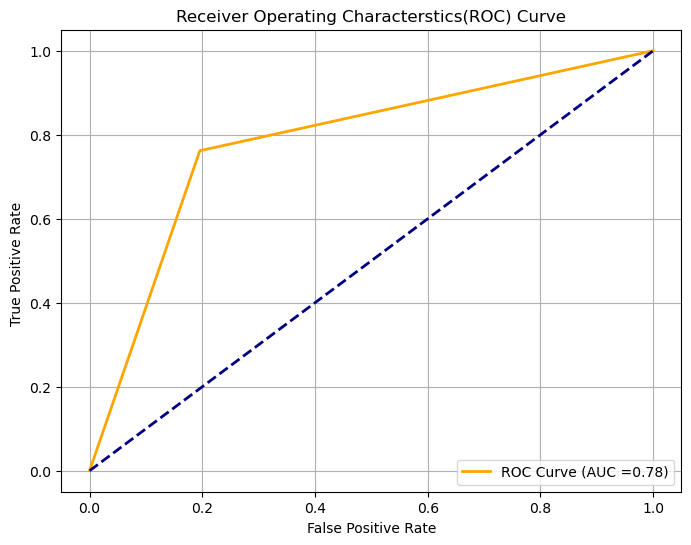

In [60]:
#Plotting ROC curve:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC Curve (AUC =%.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title("Receiver Operating Characterstics(ROC) Curve")
plt.legend(loc='lower right')
plt.grid()
plt.show()